In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load the datasets**

In [5]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

**first few rows of each dataset**

In [8]:
print("Customers Dataset:")
customers.head()

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
print("Products Dataset:")
products.head()

Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
print("Transactions Dataset:")
transactions.head()

Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Checking for missing values

In [15]:
print("Missing Values:\n")
print("Customers Missing Values:")
customers.isnull().sum()

Missing Values:

Customers Missing Values:


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [17]:
print("Products Missing Values:")
products.isnull().sum()

Products Missing Values:


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [19]:
print("Transactions Missing Values:")
transactions.isnull().sum()

Transactions Missing Values:


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

### Checking for duplicates

In [21]:
print("Duplicate Rows:\n")
print("Customers Duplicates:", customers.duplicated().sum())
print("Products Duplicates:", products.duplicated().sum())
print("Transactions Duplicates:", transactions.duplicated().sum(), "\n")

Duplicate Rows:

Customers Duplicates: 0
Products Duplicates: 0
Transactions Duplicates: 0 



### Displaying data types and structure

In [23]:
print("Data Types and Structure:\n")
print("Customers Info:")
customers.info()

Data Types and Structure:

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [25]:
print("Products Info:")
products.info()

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [27]:
print("Transactions Info:")
transactions.info()

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [29]:
# Set plot style
sns.set_theme(style="whitegrid")

In [30]:
# Merge datasets for comprehensive analysis
transactions_full = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

### Summary statistics for numerical features

In [32]:
print("Summary Statistics:\n")
print("Transactions Dataset:")
print(transactions[['Price', 'TotalValue', 'Quantity']].describe(), "\n")

Summary Statistics:

Transactions Dataset:
            Price   TotalValue     Quantity
count  1000.00000  1000.000000  1000.000000
mean    272.55407   689.995560     2.537000
std     140.73639   493.144478     1.117981
min      16.08000    16.080000     1.000000
25%     147.95000   295.295000     2.000000
50%     299.93000   588.880000     3.000000
75%     404.40000  1011.660000     4.000000
max     497.76000  1991.040000     4.000000 



### Distribution plots for numerical features

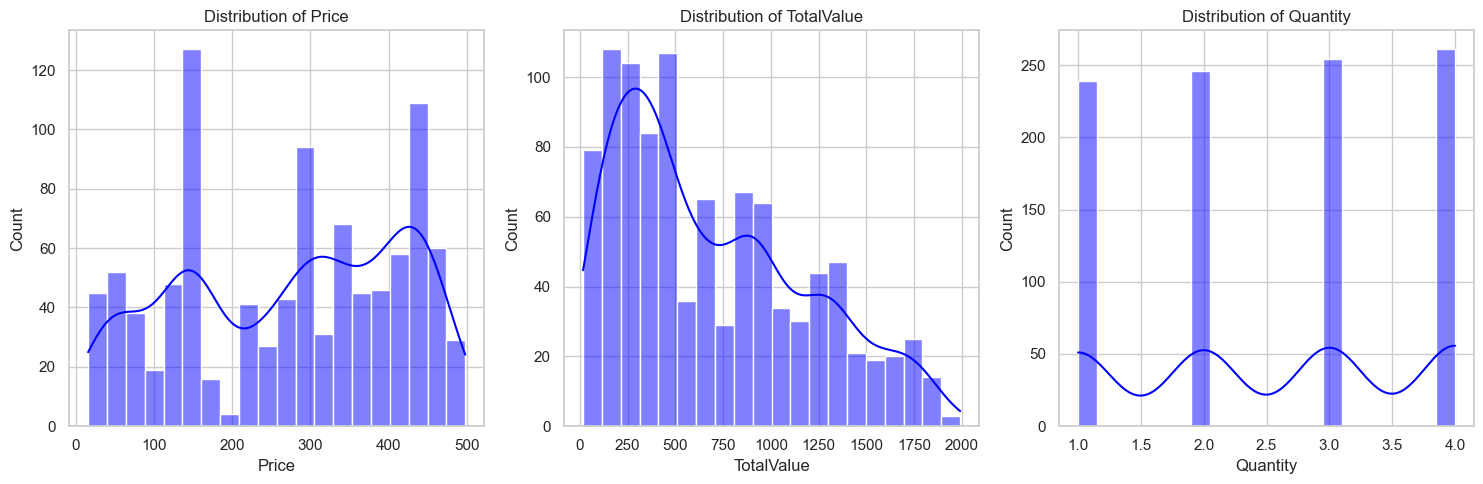

In [35]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Price', 'TotalValue', 'Quantity']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(transactions[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

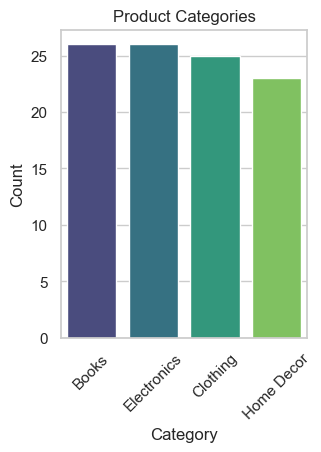

In [71]:
#  Bar charts for categorical features
plt.figure(figsize=(7, 4))

# Product categories
plt.subplot(1, 2, 1)
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

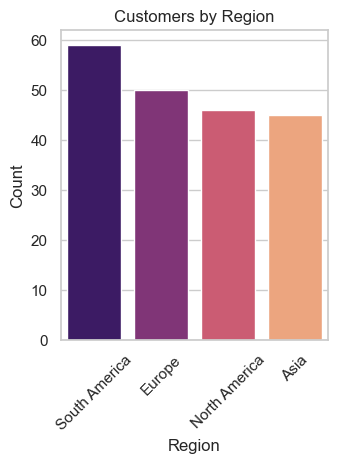

In [39]:
# Customers by region
plt.subplot(1, 2, 2)
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='magma')
plt.title('Customers by Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

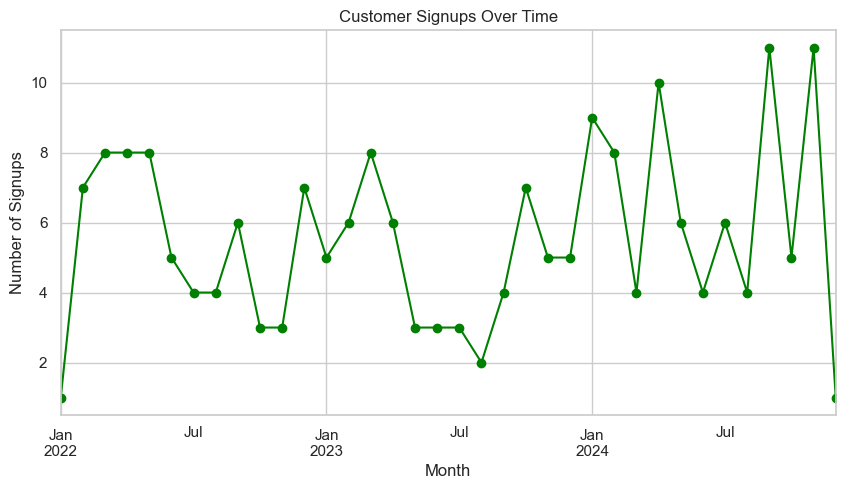

In [41]:
#  Time-series analysis for SignupDate and TransactionDate
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Plot SignupDate trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

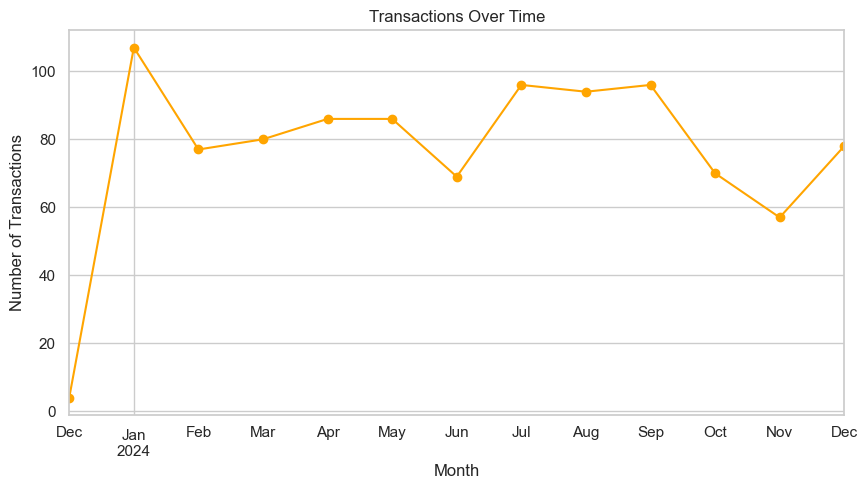

In [43]:
# Plot TransactionDate trends
transaction_trends = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 5))
transaction_trends.plot(kind='line', marker='o', color='orange')
plt.title('Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


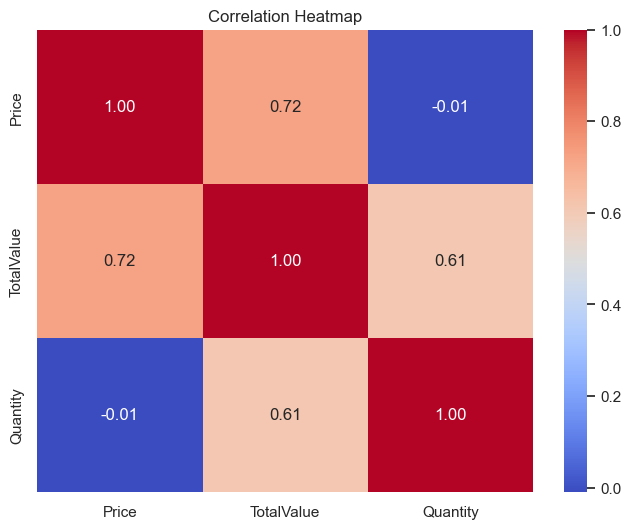

In [473]:
plt.figure(figsize=(8, 6))
correlation_matrix = transactions[['Price', 'TotalValue', 'Quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

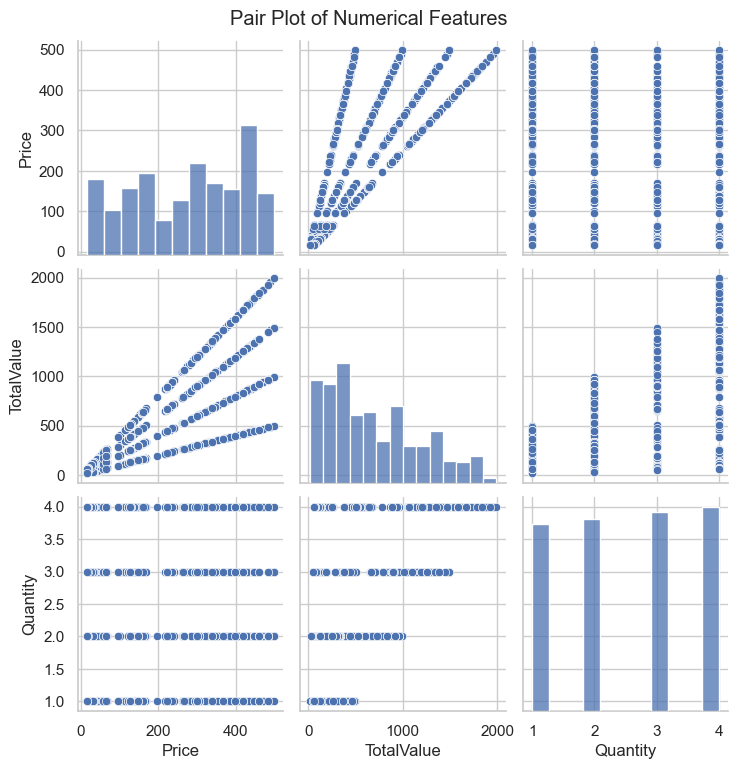

In [476]:
sns.pairplot(transactions[['Price', 'TotalValue', 'Quantity']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Customer Purchase Behavior

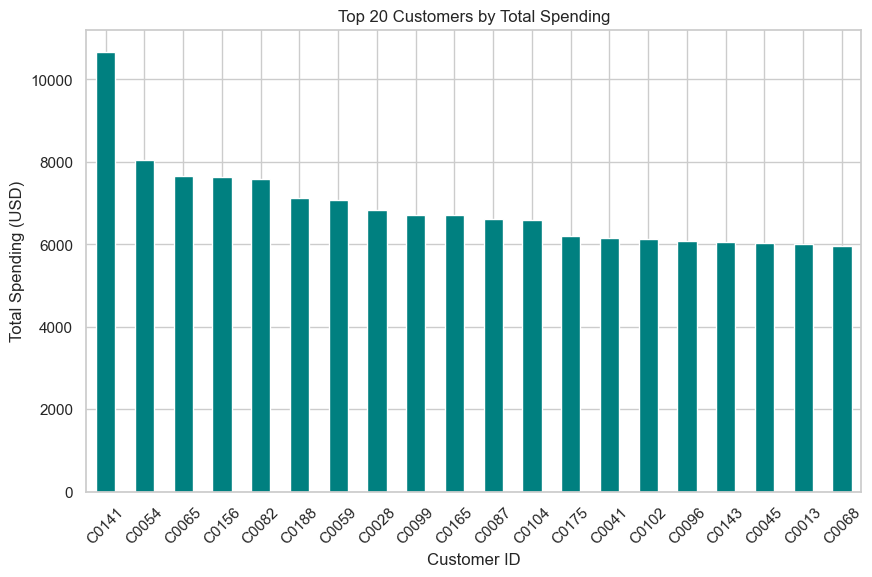

In [479]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
customer_spending[:20].plot(kind='bar', color='teal')
plt.title('Top 20 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

### Product Popularity

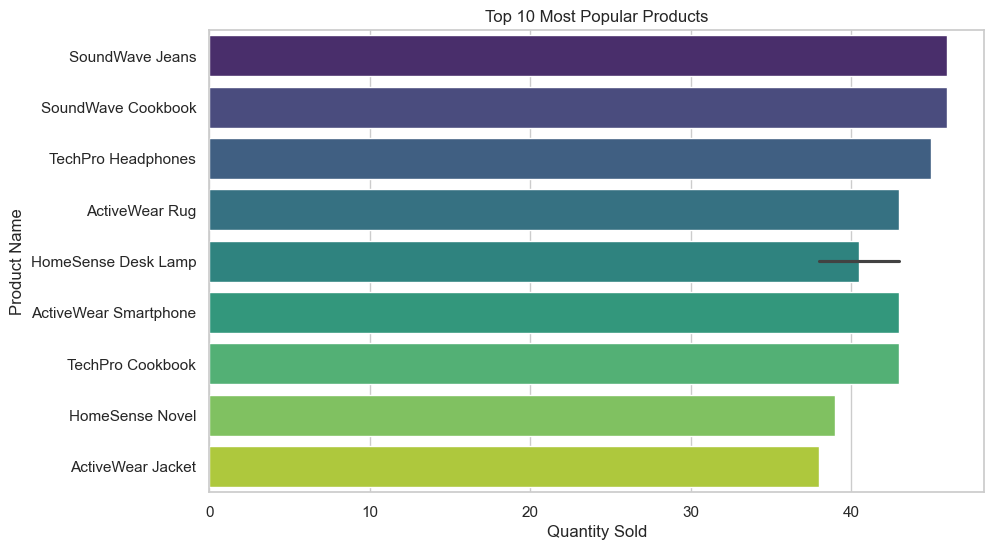

In [482]:
product_popularity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_products = product_popularity[:10].reset_index().merge(products, on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

### Revenue Over Time

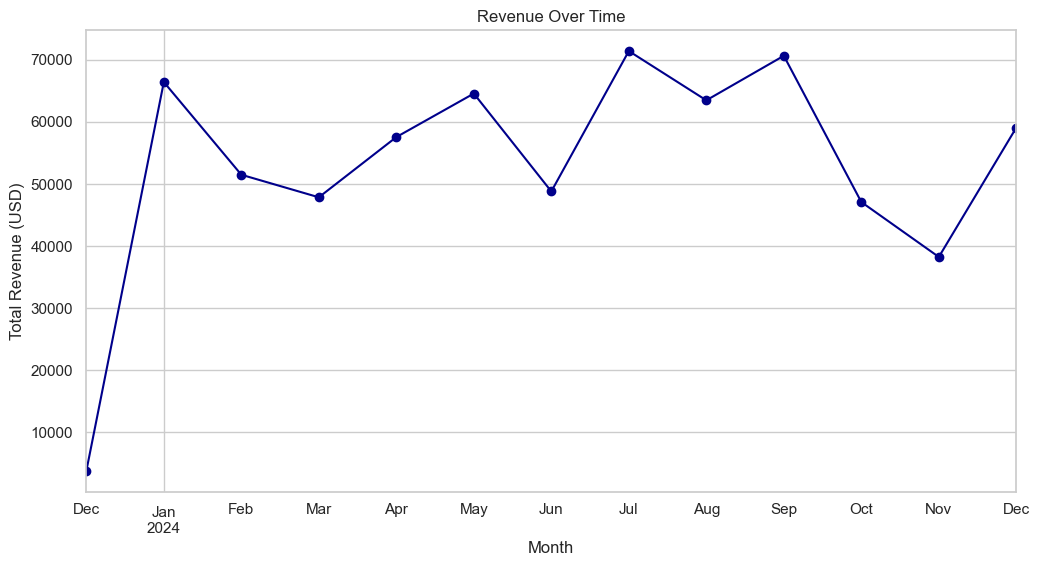

In [485]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
revenue_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(12, 6))
revenue_over_time.plot(kind='line', marker='o', color='darkblue')
plt.title('Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()

### Regional Analysis

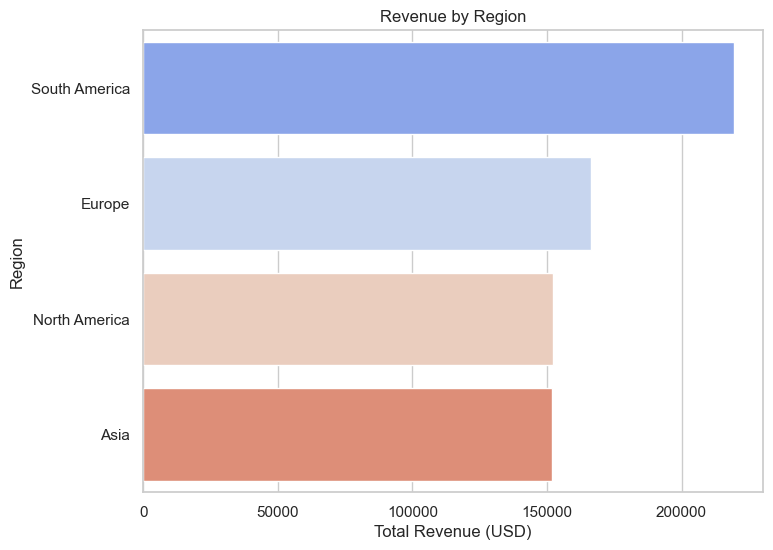

In [489]:
regional_revenue = transactions_full.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=regional_revenue.values, y=regional_revenue.index, palette='coolwarm')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.show()

### Box Plots for Price Distribution

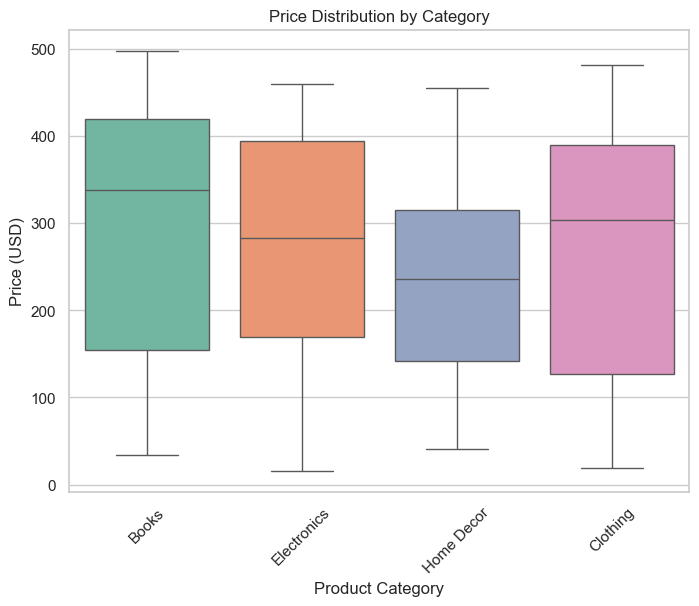

In [492]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=products['Category'], y=products['Price'], palette='Set2')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Price (USD)')
plt.show()

### Customer Retention Visualization

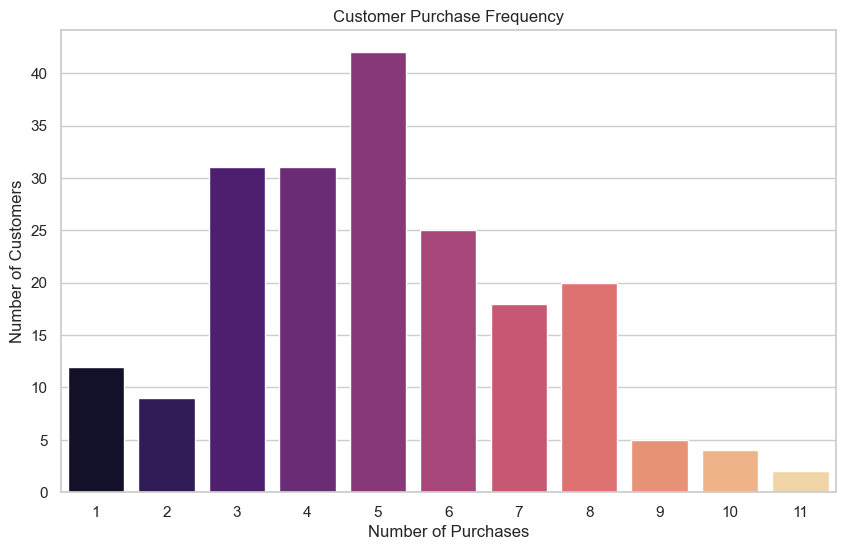

In [495]:
repeat_customers = transactions.groupby('CustomerID').size()
repeat_distribution = repeat_customers.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=repeat_distribution.index, y=repeat_distribution.values, palette='magma')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

### Joining Datasets on CustomerID and ProductID

In [498]:
transactions_full = transactions.merge(customers, on='CustomerID', how='left')
transactions_full = transactions_full.merge(products, on='ProductID', how='left')

transactions_full.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Relationship Between Region and TotalValue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


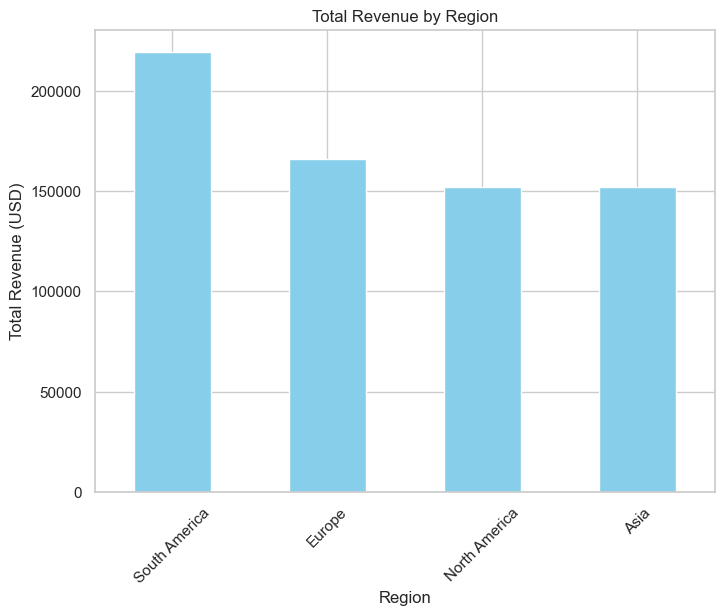

In [598]:
region_revenue = transactions_full.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

# Visualization
region_revenue.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

### Relationship Between Category and Quantity

Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


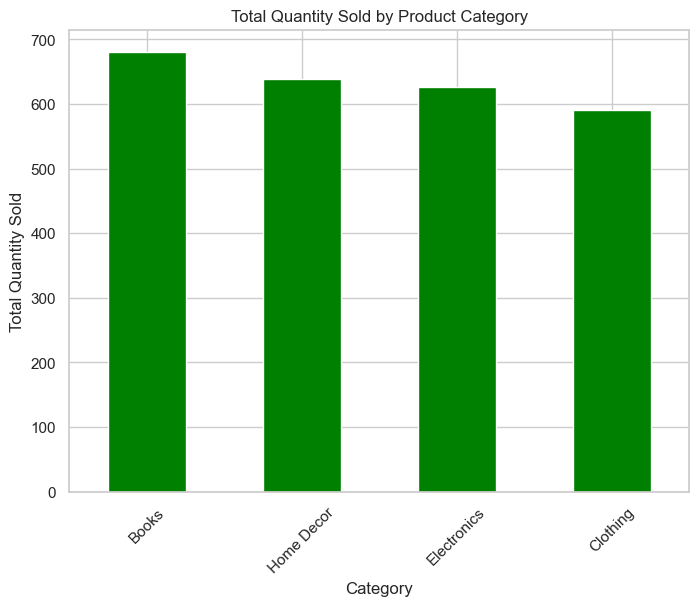

In [601]:
category_quantity = transactions_full.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(category_quantity)

# Visualization
category_quantity.plot(kind='bar', figsize=(8, 6), color='green')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Combined Analysis of Region, Category, and TotalValue

Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


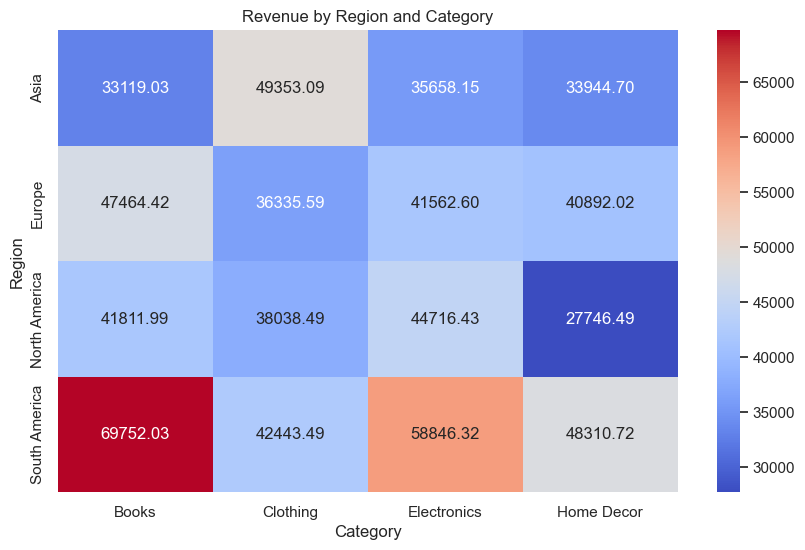

In [604]:
region_category_revenue = transactions_full.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print(region_category_revenue)

# Heatmap for visualization
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(region_category_revenue, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Revenue by Region and Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

### Relationship Between TotalValue and Quantity

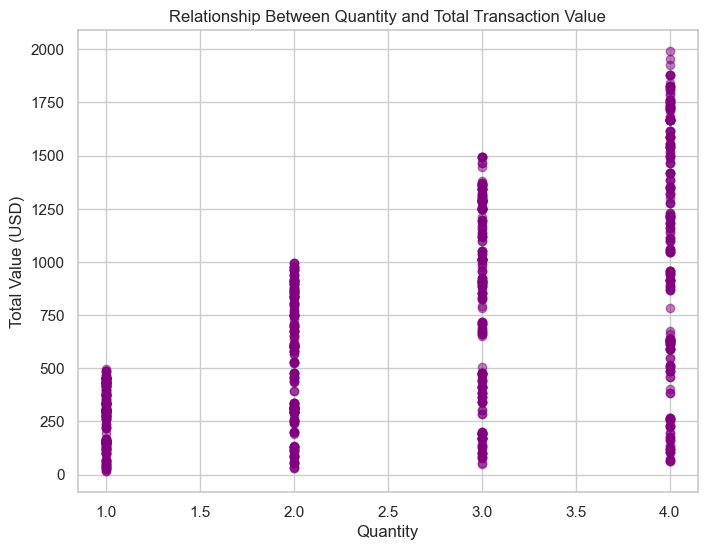

In [607]:
plt.figure(figsize=(8, 6))
plt.scatter(transactions_full['Quantity'], transactions_full['TotalValue'], alpha=0.5, color='purple')
plt.title('Relationship Between Quantity and Total Transaction Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value (USD)')
plt.grid(True)
plt.show()

In [610]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


customers['YearsSinceSignup'] = (pd.to_datetime('today') - customers['SignupDate']).dt.days / 365

# Now we can merge the data
full_data_with_customers = transactions.merge(customers[['CustomerID', 'YearsSinceSignup']], on='CustomerID')

full_data_with_customers.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearsSinceSignup
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2.153425
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,0.397260
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,0.816438
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,0.797260
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2.873973


### Grouping by Customer

In [517]:
# Grouping by CustomerID to get total spent per customer
customer_spending = full_data_with_customers.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_price=('Price', 'mean'),
    avg_years_since_signup=('YearsSinceSignup', 'mean')
).reset_index()

print(customer_spending.head())

  CustomerID  total_spent   avg_price  avg_years_since_signup
0      C0001      3354.52  278.334000                2.553425
1      C0002      1862.74  208.920000                2.956164
2      C0003      2725.38  195.707500                0.893151
3      C0004      5354.88  240.636250                2.304110
4      C0005      2034.24  291.603333                2.454795


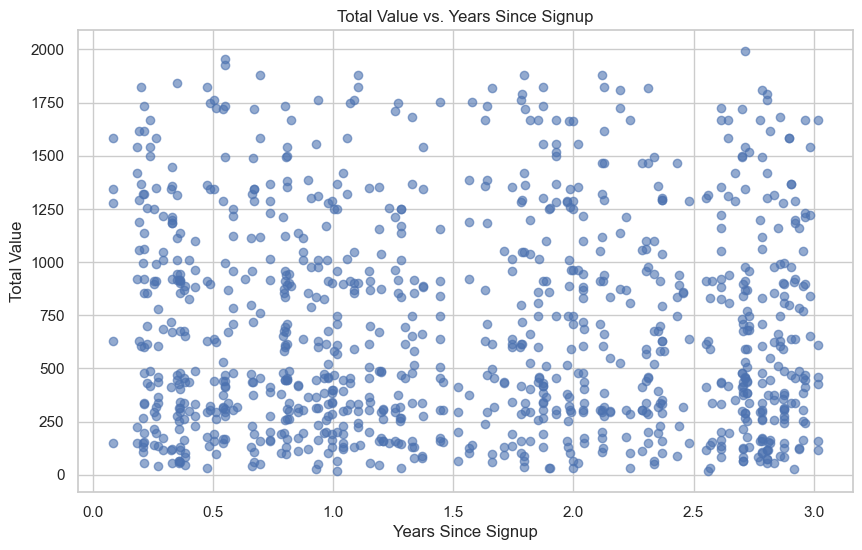

In [519]:
import matplotlib.pyplot as plt

# Scatter plot between YearsSinceSignup and TotalValue
plt.figure(figsize=(10, 6))
plt.scatter(full_data_with_customers['YearsSinceSignup'], full_data_with_customers['TotalValue'], alpha=0.6)
plt.title('Total Value vs. Years Since Signup')
plt.xlabel('Years Since Signup')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

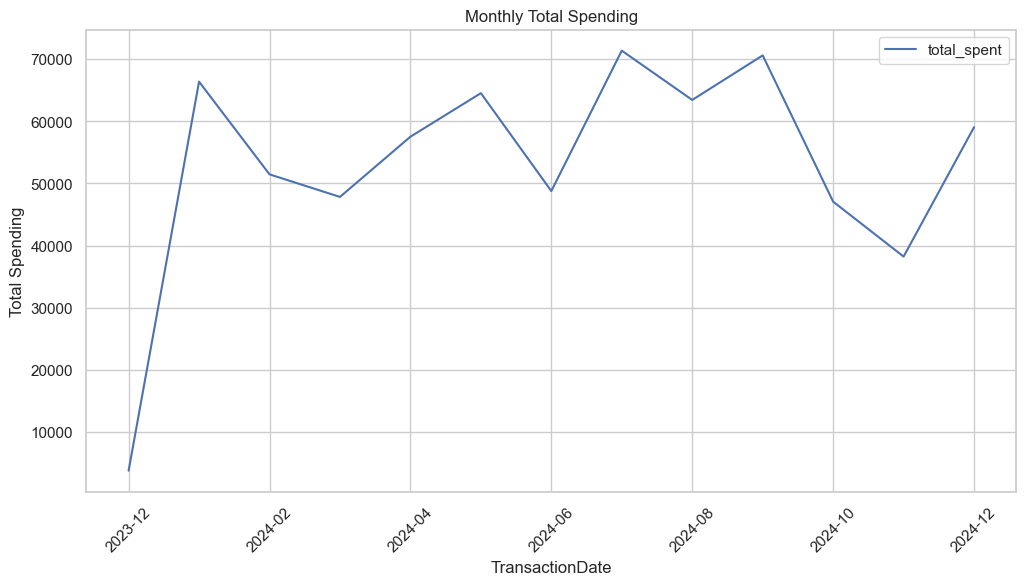

In [521]:
# Convert TransactionDate to datetime
full_data_with_customers['TransactionDate'] = pd.to_datetime(full_data_with_customers['TransactionDate'])

# Grouping by Year and Month
monthly_spending = full_data_with_customers.groupby(full_data_with_customers['TransactionDate'].dt.to_period('M')).agg(
    total_spent=('TotalValue', 'sum')
).reset_index()

# Plotting
monthly_spending['TransactionDate'] = monthly_spending['TransactionDate'].dt.strftime('%Y-%m')
monthly_spending.plot(x='TransactionDate', y='total_spent', kind='line', figsize=(12, 6))
plt.title('Monthly Total Spending')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()